In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

65536/57026 [==================================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='softmax'))
model.summary()

model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
Total params: 5,056
Trainable params: 5,056
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/60
1/1 [==============================] - 1s 1s/step - loss: 571.0565 - mae: 22.0658 - val_loss: 642.9010 - val_mae: 23.6301
Epoch 2/60
1/1 [==============================] - 0s 19ms/step - loss: 571.0565 - mae: 22.0658 - val_loss: 642.9009 - val_mae: 23.6301
Epoch 3/60
1/1 [==============================] - 0s 20ms/step - loss: 571.0564 - mae: 22.0658 - val_loss: 642.9010 - val_mae: 23.6301
Epoch 4/60
1/1 [==============================] - 0s 19ms/step - loss: 571.0565 - mae: 22.0658 - val_loss: 642.9009 - val_mae: 23.6301
Epoch 5/60
1/1 [==============================] - 0s 18ms/step - loss: 571.0564 - mae: 22.0658 - val_loss: 642.9010 - val_mae: 23.6301
Epoch 6/60
1/1 [==============================] - 0s 19ms/step - loss: 571.0565 - mae: 22.0658 - val_loss: 642.9009 - val_mae: 23.6301
Epoch 7/60
1/1 [==============================] - 0s 20ms/step - loss: 571.0565 - mae: 22.0658 - val_loss: 642.9009 - val_mae: 23.6301
Epoch 8/60
1/1 [==============================] - 0s 19ms

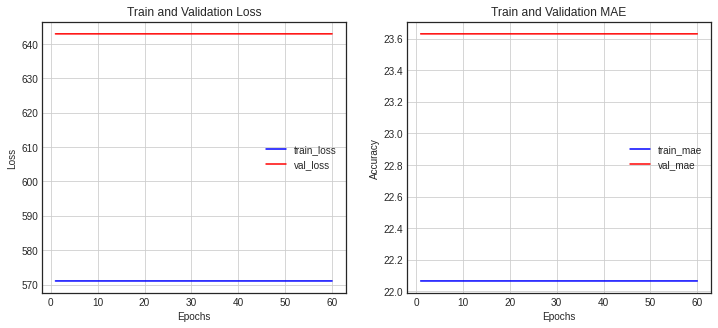

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 615.1369 - mae: 23.0628
